# 학습목표 
케라스를 통해 MNIST 손글씨 데이터셋을 분류하는, 다중분류 문제를 풉니다.  

In [1]:
import pandas as pd
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-rc1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-rc1


데이터셋 

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Value normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

(60000, 28, 28)

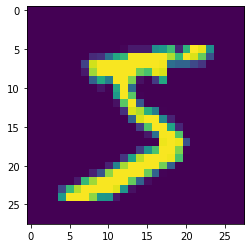

In [6]:
plt.imshow(x_train[0])
x_train.shape

신경망 모델 구축 

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') # 10개 분류의 확률값 
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3184 - accuracy: 0.9060
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1571 - accuracy: 0.9532
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1206 - accuracy: 0.9637
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1031 - accuracy: 0.9683
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0867 - accuracy: 0.9730
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790 - accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0695 - accuracy: 0.9778
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9793
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - accuracy: 0.9804
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.054

In [10]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0773 - accuracy: 0.9787 - 693ms/epoch - 2ms/step


[0.0773262083530426, 0.9786999821662903]